In [2]:
import tensorflow as tf
import numpy as np


In [3]:
import PIL.Image
from io import BytesIO
from IPython.display import Image, display



In [4]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))


In [5]:
sess = tf.InteractiveSession()


In [6]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [7]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))



In [8]:
tf.global_variables_initializer().run()


In [9]:
zs_ = zs*zs + xs

In [10]:
not_diverged = tf.abs(zs_) < 4


In [11]:
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )


In [20]:
for i in range(200): step.run()


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in cos
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sin
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in cos


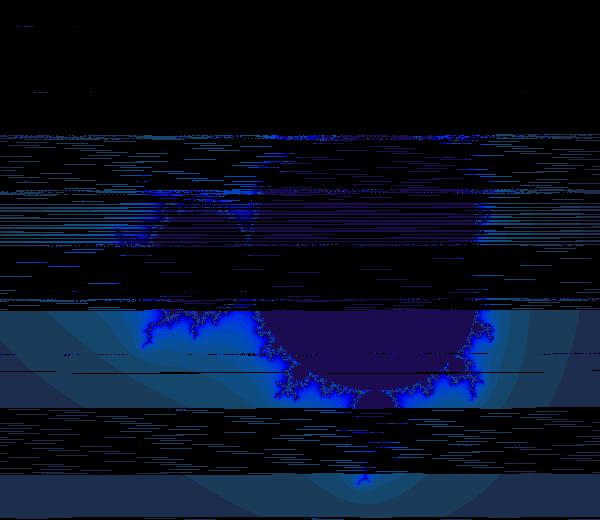

In [22]:
DisplayFractal(ns.eval())
